


Analysis of midYIS mean score and GCSE result in Art & Design using Pre-numeric


,length
Initial dataset length,299
After removing NaN entries,74
After removing other non-numeric values,74
Removed entries other than NaN,[]


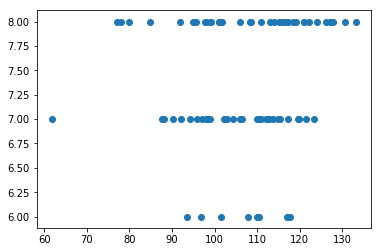

Standard Regression gives R^2 score of 0.01
Correlation analysis gives r = 0.09 with p-value 0.460



Analysis of midYIS mean score and GCSE result in Art & Design using Numeric (excluding TAGS/CAGS)


,length
Initial dataset length,180
After removing NaN entries,38
After removing other non-numeric values,38
Removed entries other than NaN,[]


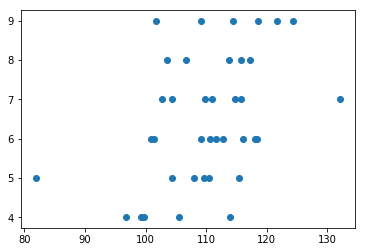

Standard Regression gives R^2 score of 0.18
Correlation analysis gives r = 0.42 with p-value 0.009



Analysis of midYIS mean score and GCSE result in Art & Design using Numeric (only TAGS/CAGS years)


,length
Initial dataset length,172
After removing NaN entries,38
After removing other non-numeric values,38
Removed entries other than NaN,[]


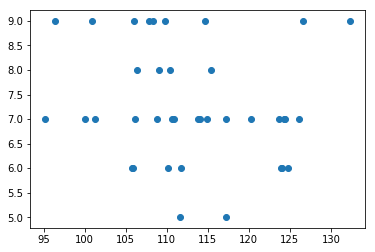

Standard Regression gives R^2 score of 0.02
Correlation analysis gives r = -0.15 with p-value 0.365



Analysis of midYIS mean score and GCSE result in Art & Design using Numeric (all years)


,length
Initial dataset length,352
After removing NaN entries,76
After removing other non-numeric values,76
Removed entries other than NaN,[]


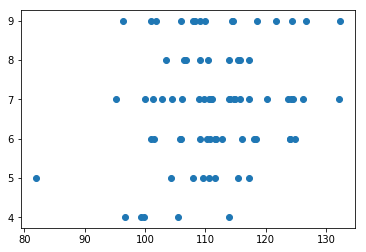

Standard Regression gives R^2 score of 0.04
Correlation analysis gives r = 0.21 with p-value 0.068



Analysis of midYIS mean score and GCSE result in Art & Design using All years except TAGS/CAGS


,length
Initial dataset length,479
After removing NaN entries,112
After removing other non-numeric values,112
Removed entries other than NaN,[]


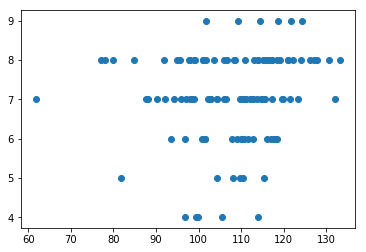

Standard Regression gives R^2 score of 0.02
Correlation analysis gives r = 0.13 with p-value 0.163



Analysis of midYIS mean score and GCSE result in Art & Design using All years


,length
Initial dataset length,651
After removing NaN entries,150
After removing other non-numeric values,150
Removed entries other than NaN,[]


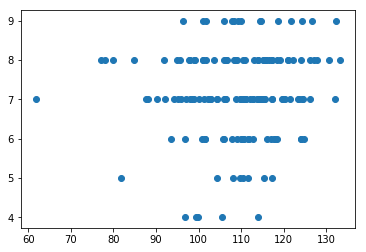

Standard Regression gives R^2 score of 0.01
Correlation analysis gives r = 0.09 with p-value 0.276



Analysis of midYIS mean score and GCSE result in Biology using Pre-numeric


,length
Initial dataset length,299
After removing NaN entries,145
After removing other non-numeric values,145
Removed entries other than NaN,[]


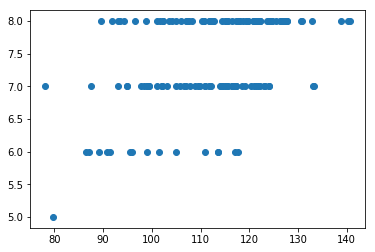

Standard Regression gives R^2 score of 0.18
Correlation analysis gives r = 0.42 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Biology using Numeric (excluding TAGS/CAGS)


,length
Initial dataset length,180
After removing NaN entries,77
After removing other non-numeric values,77
Removed entries other than NaN,[]


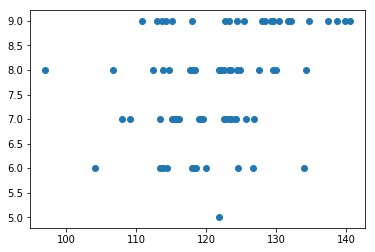

Standard Regression gives R^2 score of 0.12
Correlation analysis gives r = 0.34 with p-value 0.002



Analysis of midYIS mean score and GCSE result in Biology using Numeric (only TAGS/CAGS years)


,length
Initial dataset length,172
After removing NaN entries,86
After removing other non-numeric values,86
Removed entries other than NaN,[]


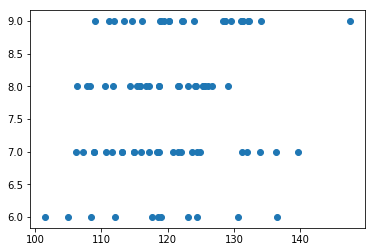

Standard Regression gives R^2 score of 0.05
Correlation analysis gives r = 0.21 with p-value 0.049



Analysis of midYIS mean score and GCSE result in Biology using Numeric (all years)


,length
Initial dataset length,352
After removing NaN entries,163
After removing other non-numeric values,163
Removed entries other than NaN,[]


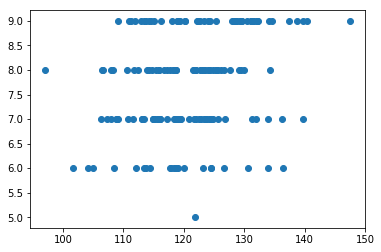

Standard Regression gives R^2 score of 0.07
Correlation analysis gives r = 0.27 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Biology using All years except TAGS/CAGS


,length
Initial dataset length,479
After removing NaN entries,222
After removing other non-numeric values,222
Removed entries other than NaN,[]


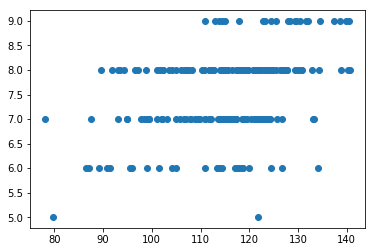

Standard Regression gives R^2 score of 0.15
Correlation analysis gives r = 0.39 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Biology using All years


,length
Initial dataset length,651
After removing NaN entries,308
After removing other non-numeric values,308
Removed entries other than NaN,[]


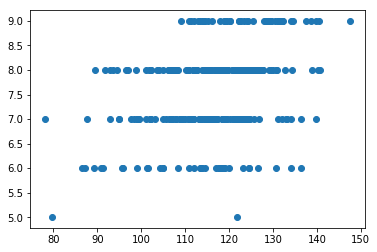

Standard Regression gives R^2 score of 0.13
Correlation analysis gives r = 0.36 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Chemistry using Pre-numeric


,length
Initial dataset length,299
After removing NaN entries,145
After removing other non-numeric values,145
Removed entries other than NaN,[]


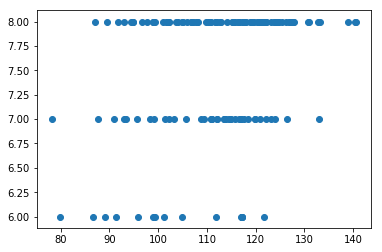

Standard Regression gives R^2 score of 0.08
Correlation analysis gives r = 0.29 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Chemistry using Numeric (excluding TAGS/CAGS)


,length
Initial dataset length,180
After removing NaN entries,77
After removing other non-numeric values,77
Removed entries other than NaN,[]


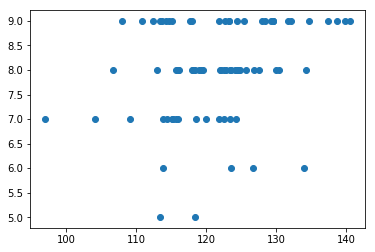

Standard Regression gives R^2 score of 0.08
Correlation analysis gives r = 0.29 with p-value 0.010



Analysis of midYIS mean score and GCSE result in Chemistry using Numeric (only TAGS/CAGS years)


,length
Initial dataset length,172
After removing NaN entries,85
After removing other non-numeric values,85
Removed entries other than NaN,[]


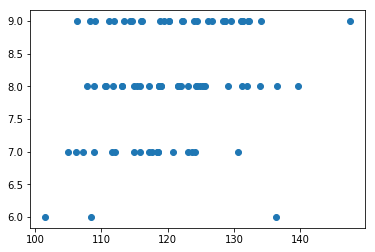

Standard Regression gives R^2 score of 0.07
Correlation analysis gives r = 0.27 with p-value 0.013



Analysis of midYIS mean score and GCSE result in Chemistry using Numeric (all years)


,length
Initial dataset length,352
After removing NaN entries,162
After removing other non-numeric values,162
Removed entries other than NaN,[]


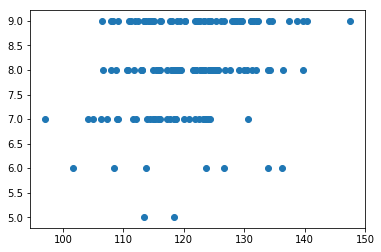

Standard Regression gives R^2 score of 0.08
Correlation analysis gives r = 0.27 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Chemistry using All years except TAGS/CAGS


,length
Initial dataset length,479
After removing NaN entries,222
After removing other non-numeric values,222
Removed entries other than NaN,[]


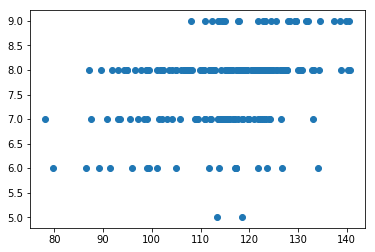

Standard Regression gives R^2 score of 0.12
Correlation analysis gives r = 0.34 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Chemistry using All years


,length
Initial dataset length,651
After removing NaN entries,307
After removing other non-numeric values,307
Removed entries other than NaN,[]


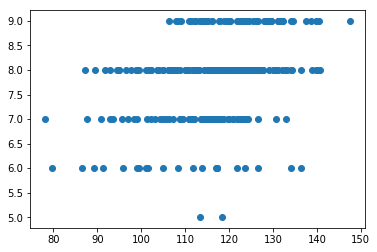

Standard Regression gives R^2 score of 0.12
Correlation analysis gives r = 0.35 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Classical Civilisation using Pre-numeric


,length
Initial dataset length,100
After removing NaN entries,24
After removing other non-numeric values,24
Removed entries other than NaN,[]


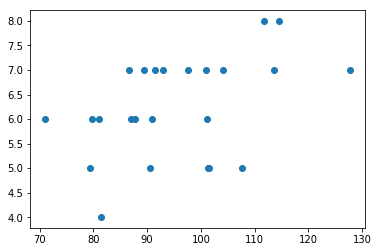

Standard Regression gives R^2 score of 0.19
Correlation analysis gives r = 0.44 with p-value 0.031



Analysis of midYIS mean score and GCSE result in Classical Civilisation using Numeric (excluding TAGS/CAGS)
No matching data found



Analysis of midYIS mean score and GCSE result in Classical Civilisation using Numeric (only TAGS/CAGS years)
No matching data found



Analysis of midYIS mean score and GCSE result in Classical Civilisation using Numeric (all years)
No matching data found



Analysis of midYIS mean score and GCSE result in Classical Civilisation using All years except TAGS/CAGS


,length
Initial dataset length,100
After removing NaN entries,24
After removing other non-numeric values,24
Removed entries other than NaN,[]


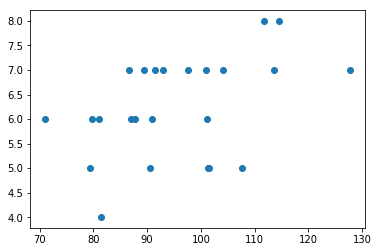

Standard Regression gives R^2 score of 0.19
Correlation analysis gives r = 0.44 with p-value 0.031



Analysis of midYIS mean score and GCSE result in Classical Civilisation using All years


,length
Initial dataset length,100
After removing NaN entries,24
After removing other non-numeric values,24
Removed entries other than NaN,[]


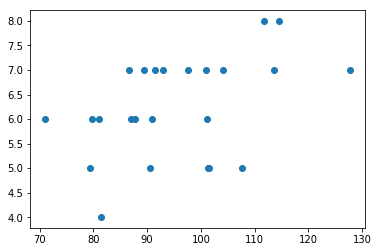

Standard Regression gives R^2 score of 0.19
Correlation analysis gives r = 0.44 with p-value 0.031



Analysis of midYIS mean score and GCSE result in Design & Technology using Pre-numeric


,length
Initial dataset length,389
After removing NaN entries,145
After removing other non-numeric values,145
Removed entries other than NaN,[]


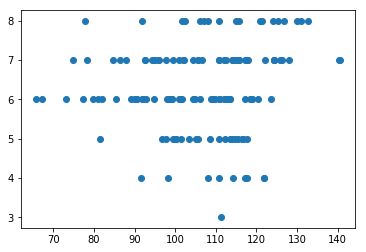

Standard Regression gives R^2 score of 0.01
Correlation analysis gives r = 0.10 with p-value 0.209



Analysis of midYIS mean score and GCSE result in Design & Technology using Numeric (excluding TAGS/CAGS)


,length
Initial dataset length,90
After removing NaN entries,28
After removing other non-numeric values,28
Removed entries other than NaN,[]


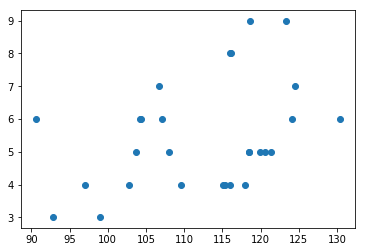

Standard Regression gives R^2 score of 0.14
Correlation analysis gives r = 0.38 with p-value 0.047



Analysis of midYIS mean score and GCSE result in Design & Technology using Numeric (only TAGS/CAGS years)


,length
Initial dataset length,172
After removing NaN entries,38
After removing other non-numeric values,38
Removed entries other than NaN,[]


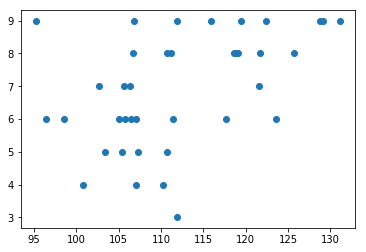

Standard Regression gives R^2 score of 0.21
Correlation analysis gives r = 0.46 with p-value 0.003



Analysis of midYIS mean score and GCSE result in Design & Technology using Numeric (all years)


,length
Initial dataset length,262
After removing NaN entries,66
After removing other non-numeric values,66
Removed entries other than NaN,[]


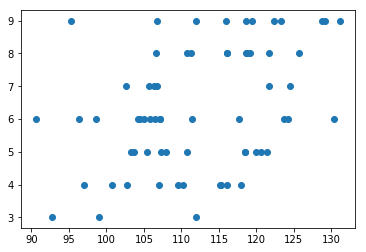

Standard Regression gives R^2 score of 0.15
Correlation analysis gives r = 0.39 with p-value 0.001



Analysis of midYIS mean score and GCSE result in Design & Technology using All years except TAGS/CAGS


,length
Initial dataset length,479
After removing NaN entries,173
After removing other non-numeric values,173
Removed entries other than NaN,[]


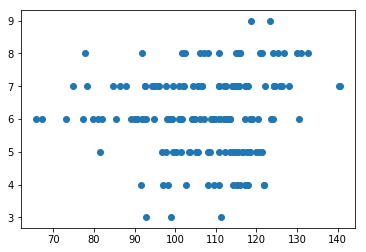

Standard Regression gives R^2 score of 0.01
Correlation analysis gives r = 0.10 with p-value 0.192



Analysis of midYIS mean score and GCSE result in Design & Technology using All years


,length
Initial dataset length,651
After removing NaN entries,211
After removing other non-numeric values,211
Removed entries other than NaN,[]


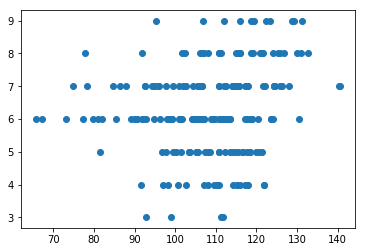

Standard Regression gives R^2 score of 0.03
Correlation analysis gives r = 0.18 with p-value 0.009



Analysis of midYIS mean score and GCSE result in Drama using Pre-numeric


,length
Initial dataset length,299
After removing NaN entries,59
After removing other non-numeric values,59
Removed entries other than NaN,[]


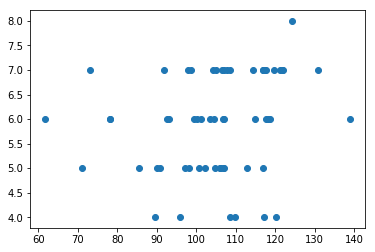

Standard Regression gives R^2 score of 0.05
Correlation analysis gives r = 0.22 with p-value 0.095



Analysis of midYIS mean score and GCSE result in Drama using Numeric (excluding TAGS/CAGS)


,length
Initial dataset length,180
After removing NaN entries,33
After removing other non-numeric values,33
Removed entries other than NaN,[]


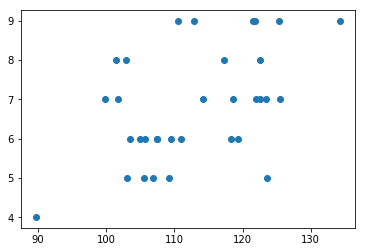

Standard Regression gives R^2 score of 0.24
Correlation analysis gives r = 0.49 with p-value 0.003



Analysis of midYIS mean score and GCSE result in Drama using Numeric (only TAGS/CAGS years)


,length
Initial dataset length,172
After removing NaN entries,42
After removing other non-numeric values,42
Removed entries other than NaN,[]


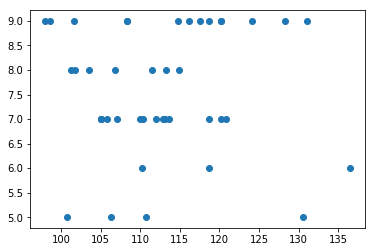

Standard Regression gives R^2 score of 0.00
Correlation analysis gives r = -0.00 with p-value 0.989



Analysis of midYIS mean score and GCSE result in Drama using Numeric (all years)


,length
Initial dataset length,352
After removing NaN entries,75
After removing other non-numeric values,75
Removed entries other than NaN,[]


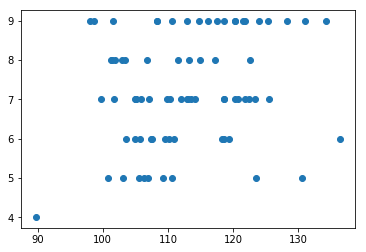

Standard Regression gives R^2 score of 0.05
Correlation analysis gives r = 0.23 with p-value 0.051



Analysis of midYIS mean score and GCSE result in Drama using All years except TAGS/CAGS


,length
Initial dataset length,479
After removing NaN entries,92
After removing other non-numeric values,92
Removed entries other than NaN,[]


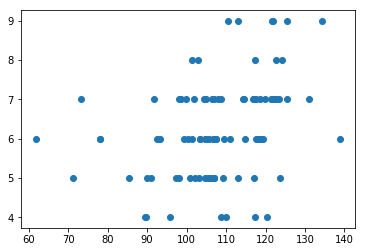

Standard Regression gives R^2 score of 0.13
Correlation analysis gives r = 0.36 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Drama using All years


,length
Initial dataset length,651
After removing NaN entries,134
After removing other non-numeric values,134
Removed entries other than NaN,[]


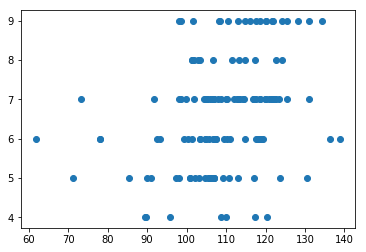

Standard Regression gives R^2 score of 0.10
Correlation analysis gives r = 0.32 with p-value 0.000



Analysis of midYIS mean score and GCSE result in English using Pre-numeric


,length
Initial dataset length,196
After removing NaN entries,194
After removing other non-numeric values,194
Removed entries other than NaN,[]


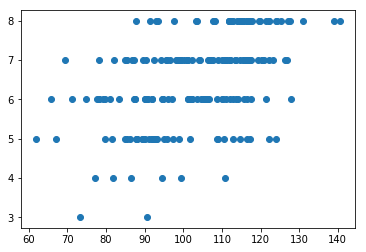

Standard Regression gives R^2 score of 0.23
Correlation analysis gives r = 0.48 with p-value 0.000



Analysis of midYIS mean score and GCSE result in English using Numeric (excluding TAGS/CAGS)


,length
Initial dataset length,283
After removing NaN entries,280
After removing other non-numeric values,280
Removed entries other than NaN,[]


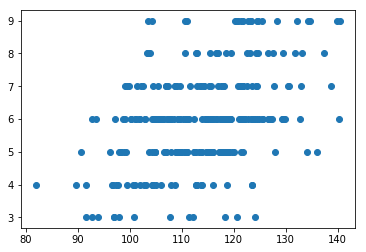

Standard Regression gives R^2 score of 0.18
Correlation analysis gives r = 0.43 with p-value 0.000



Analysis of midYIS mean score and GCSE result in English using Numeric (only TAGS/CAGS years)


,length
Initial dataset length,172
After removing NaN entries,172
After removing other non-numeric values,172
Removed entries other than NaN,[]


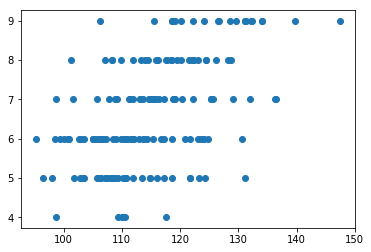

Standard Regression gives R^2 score of 0.28
Correlation analysis gives r = 0.53 with p-value 0.000



Analysis of midYIS mean score and GCSE result in English using Numeric (all years)


,length
Initial dataset length,455
After removing NaN entries,452
After removing other non-numeric values,452
Removed entries other than NaN,[]


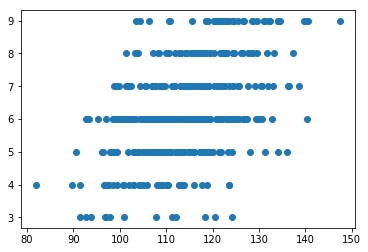

Standard Regression gives R^2 score of 0.22
Correlation analysis gives r = 0.46 with p-value 0.000



Analysis of midYIS mean score and GCSE result in English using All years except TAGS/CAGS


,length
Initial dataset length,479
After removing NaN entries,474
After removing other non-numeric values,474
Removed entries other than NaN,[]


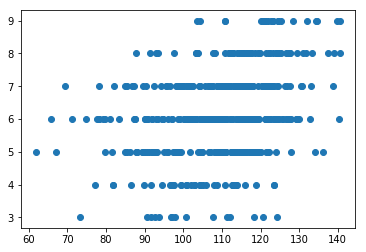

Standard Regression gives R^2 score of 0.11
Correlation analysis gives r = 0.32 with p-value 0.000



Analysis of midYIS mean score and GCSE result in English using All years


,length
Initial dataset length,651
After removing NaN entries,646
After removing other non-numeric values,646
Removed entries other than NaN,[]


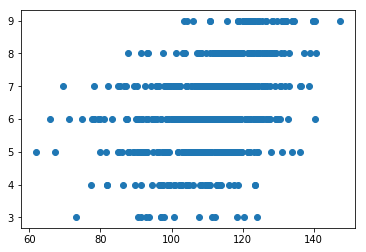

Standard Regression gives R^2 score of 0.14
Correlation analysis gives r = 0.38 with p-value 0.000



Analysis of midYIS mean score and GCSE result in English Literature using Pre-numeric


,length
Initial dataset length,299
After removing NaN entries,299
After removing other non-numeric values,299
Removed entries other than NaN,[]


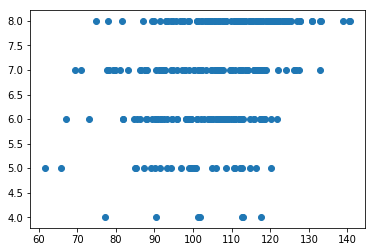

Standard Regression gives R^2 score of 0.11
Correlation analysis gives r = 0.33 with p-value 0.000



Analysis of midYIS mean score and GCSE result in English Literature using Numeric (excluding TAGS/CAGS)


,length
Initial dataset length,180
After removing NaN entries,180
After removing other non-numeric values,180
Removed entries other than NaN,[]


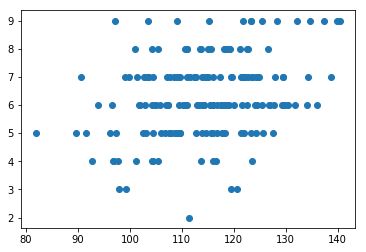

Standard Regression gives R^2 score of 0.10
Correlation analysis gives r = 0.32 with p-value 0.000



Analysis of midYIS mean score and GCSE result in English Literature using Numeric (only TAGS/CAGS years)


,length
Initial dataset length,172
After removing NaN entries,169
After removing other non-numeric values,169
Removed entries other than NaN,[]


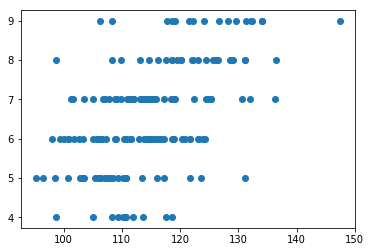

Standard Regression gives R^2 score of 0.28
Correlation analysis gives r = 0.53 with p-value 0.000



Analysis of midYIS mean score and GCSE result in English Literature using Numeric (all years)


,length
Initial dataset length,352
After removing NaN entries,349
After removing other non-numeric values,349
Removed entries other than NaN,[]


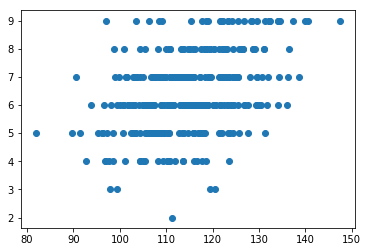

Standard Regression gives R^2 score of 0.17
Correlation analysis gives r = 0.41 with p-value 0.000



Analysis of midYIS mean score and GCSE result in English Literature using All years except TAGS/CAGS


,length
Initial dataset length,479
After removing NaN entries,479
After removing other non-numeric values,479
Removed entries other than NaN,[]


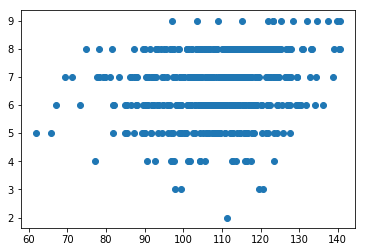

Standard Regression gives R^2 score of 0.05
Correlation analysis gives r = 0.22 with p-value 0.000



Analysis of midYIS mean score and GCSE result in English Literature using All years


,length
Initial dataset length,651
After removing NaN entries,648
After removing other non-numeric values,648
Removed entries other than NaN,[]


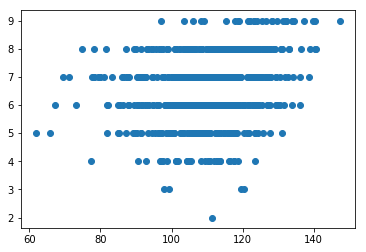

Standard Regression gives R^2 score of 0.07
Correlation analysis gives r = 0.27 with p-value 0.000



Analysis of midYIS mean score and GCSE result in French using Pre-numeric


,length
Initial dataset length,299
After removing NaN entries,226
After removing other non-numeric values,225
Removed entries other than NaN,[U]


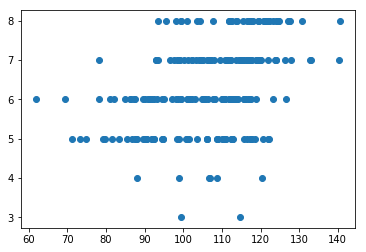

Standard Regression gives R^2 score of 0.17
Correlation analysis gives r = 0.41 with p-value 0.000



Analysis of midYIS mean score and GCSE result in French using Numeric (excluding TAGS/CAGS)


,length
Initial dataset length,180
After removing NaN entries,96
After removing other non-numeric values,96
Removed entries other than NaN,[]


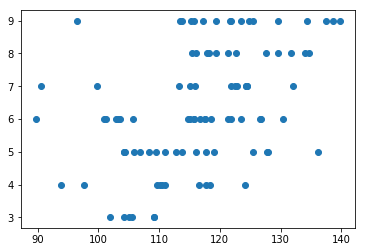

Standard Regression gives R^2 score of 0.21
Correlation analysis gives r = 0.45 with p-value 0.000



Analysis of midYIS mean score and GCSE result in French using Numeric (only TAGS/CAGS years)


,length
Initial dataset length,172
After removing NaN entries,73
After removing other non-numeric values,73
Removed entries other than NaN,[]


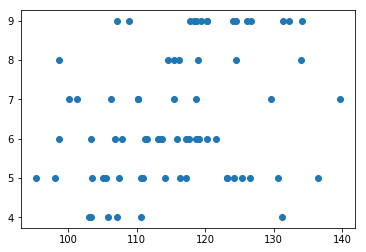

Standard Regression gives R^2 score of 0.09
Correlation analysis gives r = 0.31 with p-value 0.008



Analysis of midYIS mean score and GCSE result in French using Numeric (all years)


,length
Initial dataset length,352
After removing NaN entries,169
After removing other non-numeric values,169
Removed entries other than NaN,[]


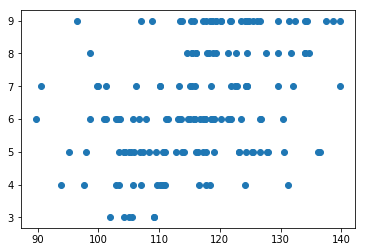

Standard Regression gives R^2 score of 0.16
Correlation analysis gives r = 0.39 with p-value 0.000



Analysis of midYIS mean score and GCSE result in French using All years except TAGS/CAGS


,length
Initial dataset length,479
After removing NaN entries,322
After removing other non-numeric values,321
Removed entries other than NaN,[U]


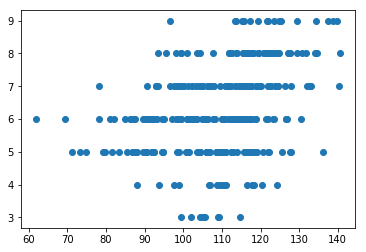

Standard Regression gives R^2 score of 0.15
Correlation analysis gives r = 0.38 with p-value 0.000



Analysis of midYIS mean score and GCSE result in French using All years


,length
Initial dataset length,651
After removing NaN entries,395
After removing other non-numeric values,394
Removed entries other than NaN,[U]


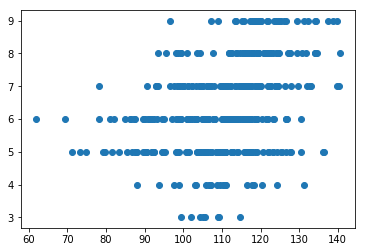

Standard Regression gives R^2 score of 0.14
Correlation analysis gives r = 0.37 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Geography using Pre-numeric


,length
Initial dataset length,299
After removing NaN entries,194
After removing other non-numeric values,194
Removed entries other than NaN,[]


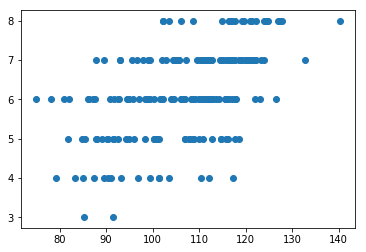

Standard Regression gives R^2 score of 0.28
Correlation analysis gives r = 0.53 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Geography using Numeric (excluding TAGS/CAGS)


,length
Initial dataset length,180
After removing NaN entries,100
After removing other non-numeric values,100
Removed entries other than NaN,[]


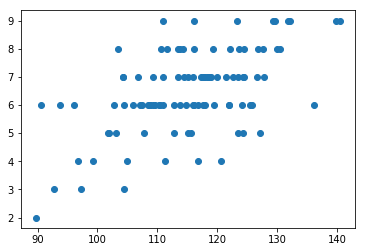

Standard Regression gives R^2 score of 0.32
Correlation analysis gives r = 0.57 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Geography using Numeric (only TAGS/CAGS years)


,length
Initial dataset length,172
After removing NaN entries,72
After removing other non-numeric values,72
Removed entries other than NaN,[]


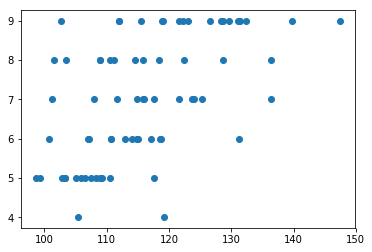

Standard Regression gives R^2 score of 0.29
Correlation analysis gives r = 0.54 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Geography using Numeric (all years)


,length
Initial dataset length,352
After removing NaN entries,172
After removing other non-numeric values,172
Removed entries other than NaN,[]


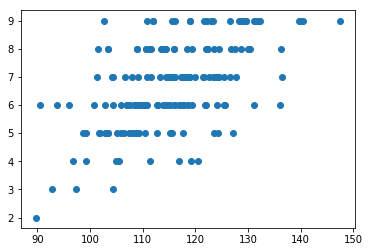

Standard Regression gives R^2 score of 0.30
Correlation analysis gives r = 0.55 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Geography using All years except TAGS/CAGS


,length
Initial dataset length,479
After removing NaN entries,294
After removing other non-numeric values,294
Removed entries other than NaN,[]


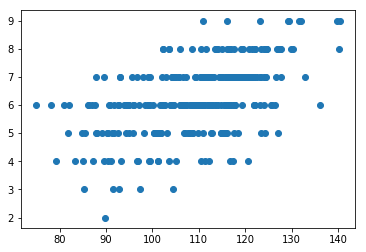

Standard Regression gives R^2 score of 0.29
Correlation analysis gives r = 0.54 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Geography using All years


,length
Initial dataset length,651
After removing NaN entries,366
After removing other non-numeric values,366
Removed entries other than NaN,[]


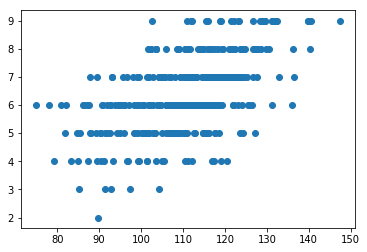

Standard Regression gives R^2 score of 0.30
Correlation analysis gives r = 0.55 with p-value 0.000



Analysis of midYIS mean score and GCSE result in German using Pre-numeric


,length
Initial dataset length,299
After removing NaN entries,29
After removing other non-numeric values,29
Removed entries other than NaN,[]


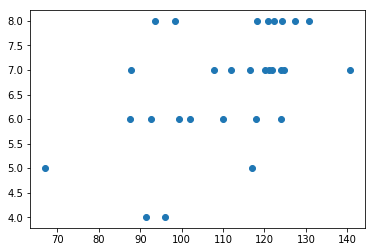

Standard Regression gives R^2 score of 0.25
Correlation analysis gives r = 0.50 with p-value 0.006



Analysis of midYIS mean score and GCSE result in German using Numeric (excluding TAGS/CAGS)


,length
Initial dataset length,180
After removing NaN entries,15
After removing other non-numeric values,15
Removed entries other than NaN,[]


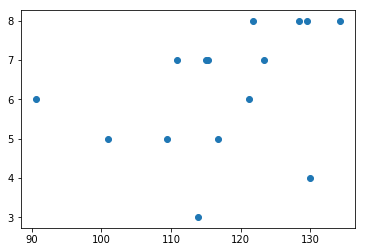

Standard Regression gives R^2 score of 0.13
Correlation analysis gives r = 0.37 with p-value 0.179



Analysis of midYIS mean score and GCSE result in German using Numeric (only TAGS/CAGS years)


,length
Initial dataset length,172
After removing NaN entries,20
After removing other non-numeric values,20
Removed entries other than NaN,[]


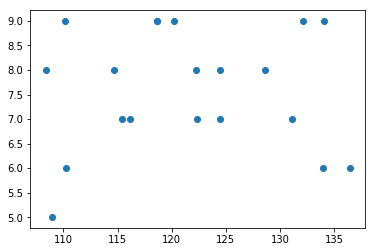

Standard Regression gives R^2 score of 0.00
Correlation analysis gives r = 0.04 with p-value 0.861



Analysis of midYIS mean score and GCSE result in German using Numeric (all years)


,length
Initial dataset length,352
After removing NaN entries,35
After removing other non-numeric values,35
Removed entries other than NaN,[]


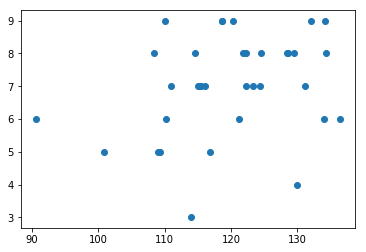

Standard Regression gives R^2 score of 0.08
Correlation analysis gives r = 0.28 with p-value 0.099



Analysis of midYIS mean score and GCSE result in German using All years except TAGS/CAGS


,length
Initial dataset length,479
After removing NaN entries,44
After removing other non-numeric values,44
Removed entries other than NaN,[]


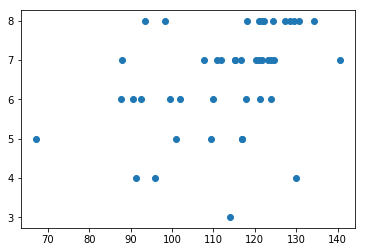

Standard Regression gives R^2 score of 0.15
Correlation analysis gives r = 0.39 with p-value 0.009



Analysis of midYIS mean score and GCSE result in German using All years


,length
Initial dataset length,651
After removing NaN entries,64
After removing other non-numeric values,64
Removed entries other than NaN,[]


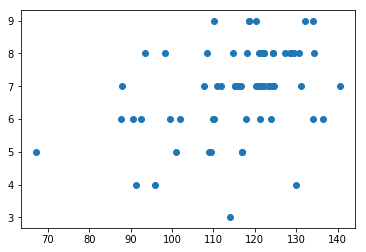

Standard Regression gives R^2 score of 0.15
Correlation analysis gives r = 0.39 with p-value 0.002



Analysis of midYIS mean score and GCSE result in History using Pre-numeric


,length
Initial dataset length,389
After removing NaN entries,251
After removing other non-numeric values,251
Removed entries other than NaN,[]


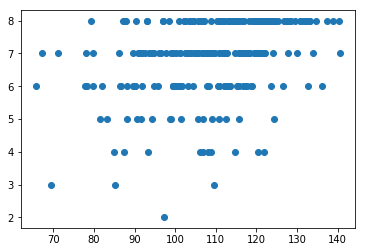

Standard Regression gives R^2 score of 0.12
Correlation analysis gives r = 0.35 with p-value 0.000



Analysis of midYIS mean score and GCSE result in History using Numeric (excluding TAGS/CAGS)


,length
Initial dataset length,90
After removing NaN entries,50
After removing other non-numeric values,50
Removed entries other than NaN,[]


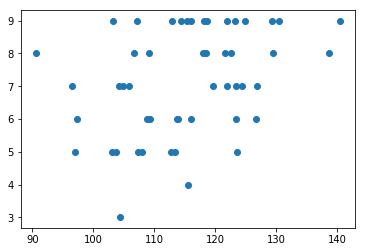

Standard Regression gives R^2 score of 0.13
Correlation analysis gives r = 0.36 with p-value 0.011



Analysis of midYIS mean score and GCSE result in History using Numeric (only TAGS/CAGS years)


,length
Initial dataset length,172
After removing NaN entries,106
After removing other non-numeric values,106
Removed entries other than NaN,[]


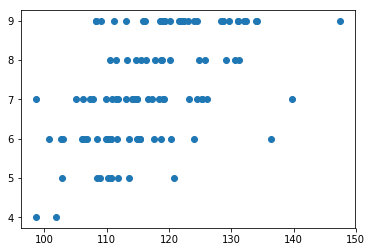

Standard Regression gives R^2 score of 0.29
Correlation analysis gives r = 0.54 with p-value 0.000



Analysis of midYIS mean score and GCSE result in History using Numeric (all years)


,length
Initial dataset length,262
After removing NaN entries,156
After removing other non-numeric values,156
Removed entries other than NaN,[]


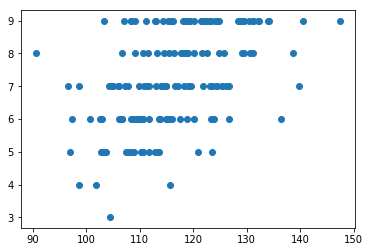

Standard Regression gives R^2 score of 0.22
Correlation analysis gives r = 0.47 with p-value 0.000



Analysis of midYIS mean score and GCSE result in History using All years except TAGS/CAGS


,length
Initial dataset length,479
After removing NaN entries,301
After removing other non-numeric values,301
Removed entries other than NaN,[]


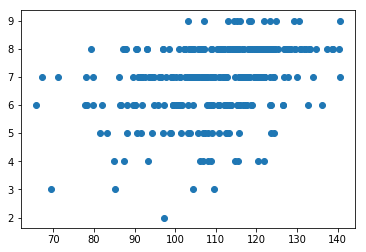

Standard Regression gives R^2 score of 0.12
Correlation analysis gives r = 0.35 with p-value 0.000



Analysis of midYIS mean score and GCSE result in History using All years


,length
Initial dataset length,651
After removing NaN entries,407
After removing other non-numeric values,407
Removed entries other than NaN,[]


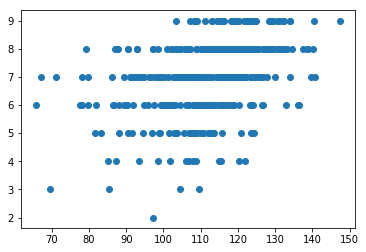

Standard Regression gives R^2 score of 0.16
Correlation analysis gives r = 0.39 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Latin using Pre-numeric


,length
Initial dataset length,100
After removing NaN entries,22
After removing other non-numeric values,22
Removed entries other than NaN,[]


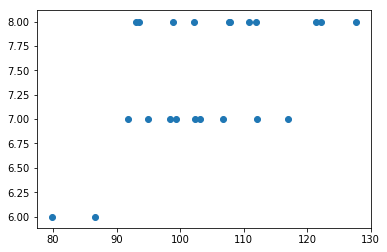

Standard Regression gives R^2 score of 0.32
Correlation analysis gives r = 0.56 with p-value 0.006



Analysis of midYIS mean score and GCSE result in Latin using Numeric (excluding TAGS/CAGS)
No matching data found



Analysis of midYIS mean score and GCSE result in Latin using Numeric (only TAGS/CAGS years)
No matching data found



Analysis of midYIS mean score and GCSE result in Latin using Numeric (all years)
No matching data found



Analysis of midYIS mean score and GCSE result in Latin using All years except TAGS/CAGS


,length
Initial dataset length,100
After removing NaN entries,22
After removing other non-numeric values,22
Removed entries other than NaN,[]


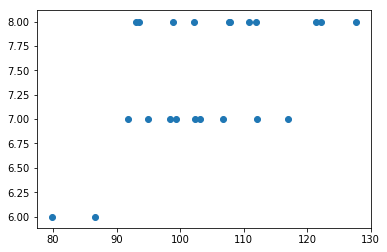

Standard Regression gives R^2 score of 0.32
Correlation analysis gives r = 0.56 with p-value 0.006



Analysis of midYIS mean score and GCSE result in Latin using All years


,length
Initial dataset length,100
After removing NaN entries,22
After removing other non-numeric values,22
Removed entries other than NaN,[]


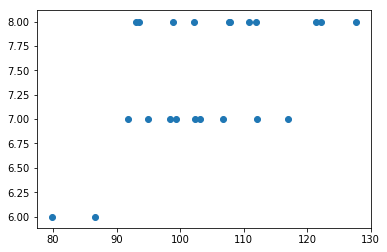

Standard Regression gives R^2 score of 0.32
Correlation analysis gives r = 0.56 with p-value 0.006



Analysis of midYIS mean score and GCSE result in Mathematics using Pre-numeric


,length
Initial dataset length,389
After removing NaN entries,310
After removing other non-numeric values,310
Removed entries other than NaN,[]


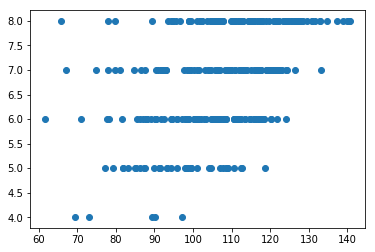

Standard Regression gives R^2 score of 0.20
Correlation analysis gives r = 0.45 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Mathematics using Numeric (excluding TAGS/CAGS)


,length
Initial dataset length,180
After removing NaN entries,166
After removing other non-numeric values,166
Removed entries other than NaN,[]


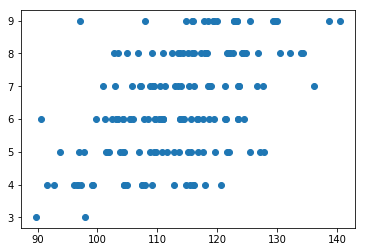

Standard Regression gives R^2 score of 0.27
Correlation analysis gives r = 0.52 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Mathematics using Numeric (only TAGS/CAGS years)


,length
Initial dataset length,172
After removing NaN entries,172
After removing other non-numeric values,172
Removed entries other than NaN,[]


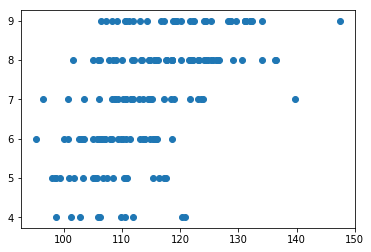

Standard Regression gives R^2 score of 0.32
Correlation analysis gives r = 0.56 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Mathematics using Numeric (all years)


,length
Initial dataset length,352
After removing NaN entries,338
After removing other non-numeric values,338
Removed entries other than NaN,[]


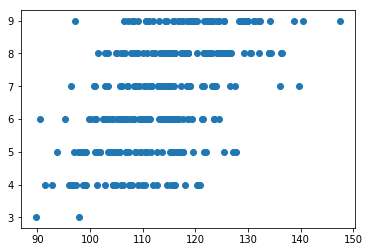

Standard Regression gives R^2 score of 0.29
Correlation analysis gives r = 0.54 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Mathematics using All years except TAGS/CAGS


,length
Initial dataset length,569
After removing NaN entries,476
After removing other non-numeric values,476
Removed entries other than NaN,[]


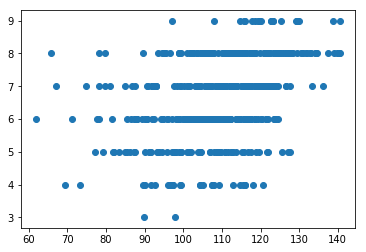

Standard Regression gives R^2 score of 0.16
Correlation analysis gives r = 0.40 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Mathematics using All years


,length
Initial dataset length,741
After removing NaN entries,648
After removing other non-numeric values,648
Removed entries other than NaN,[]


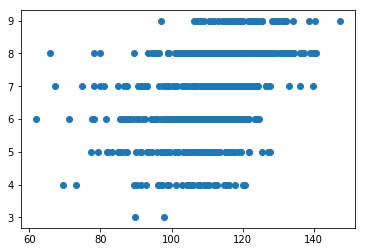

Standard Regression gives R^2 score of 0.20
Correlation analysis gives r = 0.45 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Music using Pre-numeric


,length
Initial dataset length,299
After removing NaN entries,32
After removing other non-numeric values,32
Removed entries other than NaN,[]


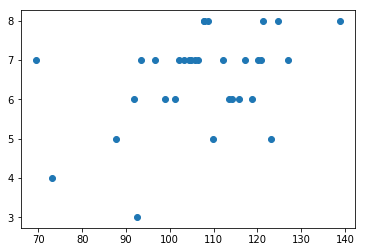

Standard Regression gives R^2 score of 0.17
Correlation analysis gives r = 0.41 with p-value 0.019



Analysis of midYIS mean score and GCSE result in Music using Numeric (excluding TAGS/CAGS)


,length
Initial dataset length,180
After removing NaN entries,14
After removing other non-numeric values,14
Removed entries other than NaN,[]


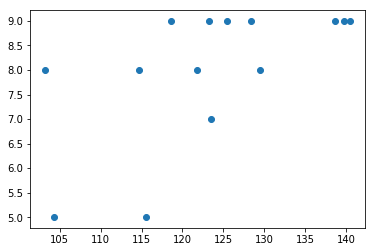

Standard Regression gives R^2 score of 0.37
Correlation analysis gives r = 0.61 with p-value 0.021



Analysis of midYIS mean score and GCSE result in Music using Numeric (only TAGS/CAGS years)


,length
Initial dataset length,172
After removing NaN entries,21
After removing other non-numeric values,21
Removed entries other than NaN,[]


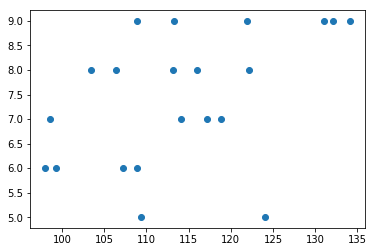

Standard Regression gives R^2 score of 0.22
Correlation analysis gives r = 0.47 with p-value 0.033



Analysis of midYIS mean score and GCSE result in Music using Numeric (all years)


,length
Initial dataset length,352
After removing NaN entries,35
After removing other non-numeric values,35
Removed entries other than NaN,[]


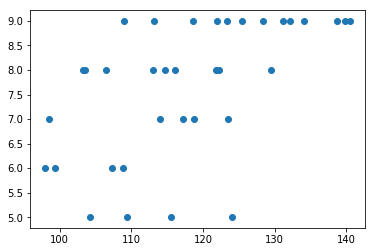

Standard Regression gives R^2 score of 0.31
Correlation analysis gives r = 0.55 with p-value 0.001



Analysis of midYIS mean score and GCSE result in Music using All years except TAGS/CAGS


,length
Initial dataset length,479
After removing NaN entries,46
After removing other non-numeric values,46
Removed entries other than NaN,[]


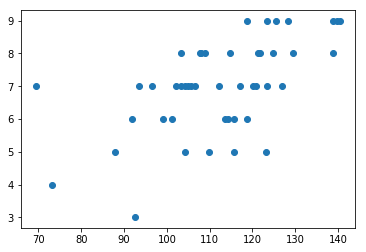

Standard Regression gives R^2 score of 0.34
Correlation analysis gives r = 0.58 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Music using All years


,length
Initial dataset length,651
After removing NaN entries,67
After removing other non-numeric values,67
Removed entries other than NaN,[]


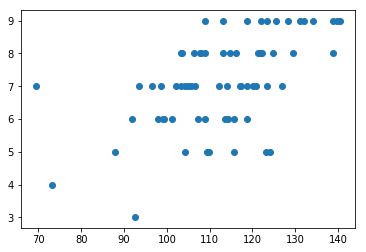

Standard Regression gives R^2 score of 0.31
Correlation analysis gives r = 0.55 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Physical Education using Pre-numeric


,length
Initial dataset length,299
After removing NaN entries,81
After removing other non-numeric values,81
Removed entries other than NaN,[]


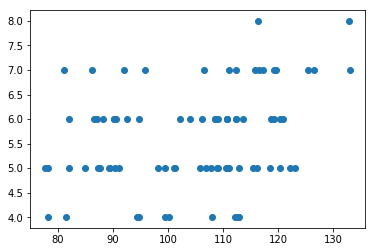

Standard Regression gives R^2 score of 0.09
Correlation analysis gives r = 0.31 with p-value 0.006



Analysis of midYIS mean score and GCSE result in Physical Education using Numeric (excluding TAGS/CAGS)


,length
Initial dataset length,180
After removing NaN entries,54
After removing other non-numeric values,54
Removed entries other than NaN,[]


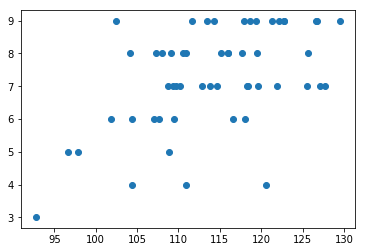

Standard Regression gives R^2 score of 0.26
Correlation analysis gives r = 0.51 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Physical Education using Numeric (only TAGS/CAGS years)


,length
Initial dataset length,172
After removing NaN entries,64
After removing other non-numeric values,64
Removed entries other than NaN,[]


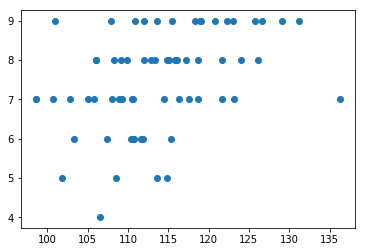

Standard Regression gives R^2 score of 0.16
Correlation analysis gives r = 0.39 with p-value 0.001



Analysis of midYIS mean score and GCSE result in Physical Education using Numeric (all years)


,length
Initial dataset length,352
After removing NaN entries,118
After removing other non-numeric values,118
Removed entries other than NaN,[]


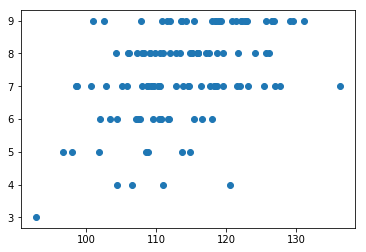

Standard Regression gives R^2 score of 0.20
Correlation analysis gives r = 0.45 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Physical Education using All years except TAGS/CAGS


,length
Initial dataset length,479
After removing NaN entries,135
After removing other non-numeric values,135
Removed entries other than NaN,[]


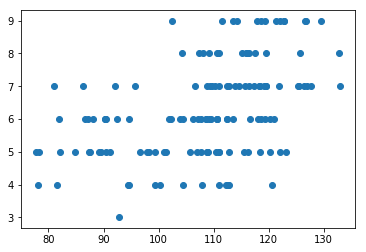

Standard Regression gives R^2 score of 0.22
Correlation analysis gives r = 0.47 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Physical Education using All years


,length
Initial dataset length,651
After removing NaN entries,199
After removing other non-numeric values,199
Removed entries other than NaN,[]


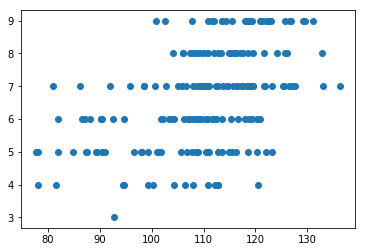

Standard Regression gives R^2 score of 0.24
Correlation analysis gives r = 0.49 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Physics using Pre-numeric


,length
Initial dataset length,299
After removing NaN entries,145
After removing other non-numeric values,145
Removed entries other than NaN,[]


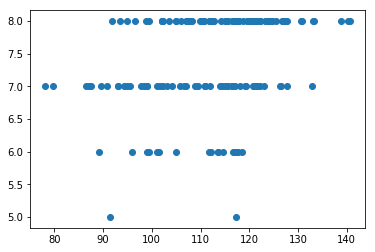

Standard Regression gives R^2 score of 0.09
Correlation analysis gives r = 0.30 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Physics using Numeric (excluding TAGS/CAGS)


,length
Initial dataset length,180
After removing NaN entries,77
After removing other non-numeric values,77
Removed entries other than NaN,[]


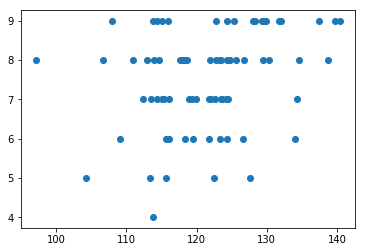

Standard Regression gives R^2 score of 0.08
Correlation analysis gives r = 0.29 with p-value 0.011



Analysis of midYIS mean score and GCSE result in Physics using Numeric (only TAGS/CAGS years)


,length
Initial dataset length,172
After removing NaN entries,86
After removing other non-numeric values,86
Removed entries other than NaN,[]


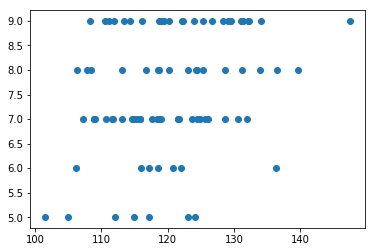

Standard Regression gives R^2 score of 0.09
Correlation analysis gives r = 0.30 with p-value 0.005



Analysis of midYIS mean score and GCSE result in Physics using Numeric (all years)


,length
Initial dataset length,352
After removing NaN entries,163
After removing other non-numeric values,163
Removed entries other than NaN,[]


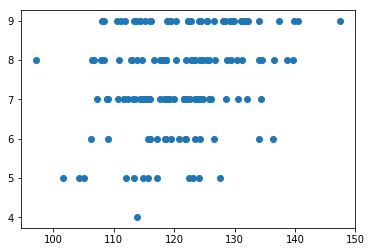

Standard Regression gives R^2 score of 0.09
Correlation analysis gives r = 0.29 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Physics using All years except TAGS/CAGS


,length
Initial dataset length,479
After removing NaN entries,222
After removing other non-numeric values,222
Removed entries other than NaN,[]


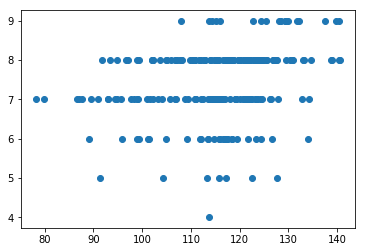

Standard Regression gives R^2 score of 0.08
Correlation analysis gives r = 0.28 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Physics using All years


,length
Initial dataset length,651
After removing NaN entries,308
After removing other non-numeric values,308
Removed entries other than NaN,[]


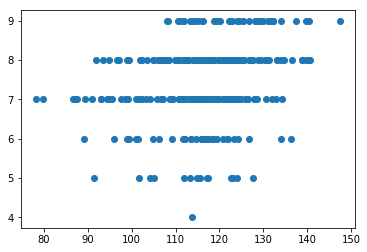

Standard Regression gives R^2 score of 0.08
Correlation analysis gives r = 0.29 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Religious Studies using Pre-numeric


,length
Initial dataset length,299
After removing NaN entries,122
After removing other non-numeric values,122
Removed entries other than NaN,[]


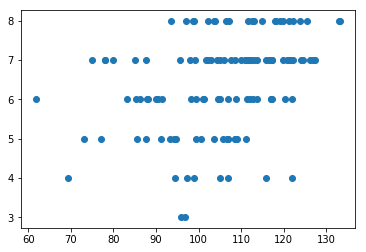

Standard Regression gives R^2 score of 0.12
Correlation analysis gives r = 0.35 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Religious Studies using Numeric (excluding TAGS/CAGS)


,length
Initial dataset length,180
After removing NaN entries,55
After removing other non-numeric values,55
Removed entries other than NaN,[]


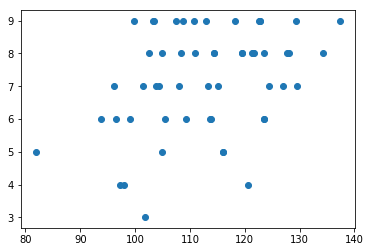

Standard Regression gives R^2 score of 0.14
Correlation analysis gives r = 0.37 with p-value 0.006



Analysis of midYIS mean score and GCSE result in Religious Studies using Numeric (only TAGS/CAGS years)


,length
Initial dataset length,172
After removing NaN entries,50
After removing other non-numeric values,50
Removed entries other than NaN,[]


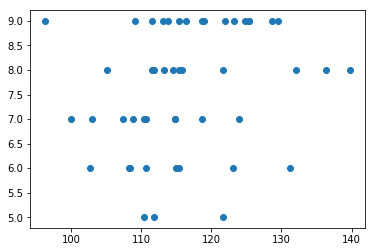

Standard Regression gives R^2 score of 0.05
Correlation analysis gives r = 0.22 with p-value 0.121



Analysis of midYIS mean score and GCSE result in Religious Studies using Numeric (all years)


,length
Initial dataset length,352
After removing NaN entries,105
After removing other non-numeric values,105
Removed entries other than NaN,[]


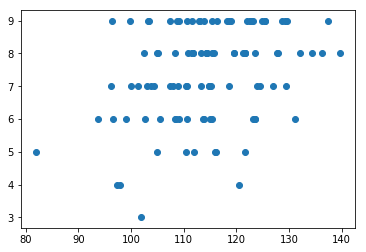

Standard Regression gives R^2 score of 0.11
Correlation analysis gives r = 0.33 with p-value 0.001



Analysis of midYIS mean score and GCSE result in Religious Studies using All years except TAGS/CAGS


,length
Initial dataset length,479
After removing NaN entries,177
After removing other non-numeric values,177
Removed entries other than NaN,[]


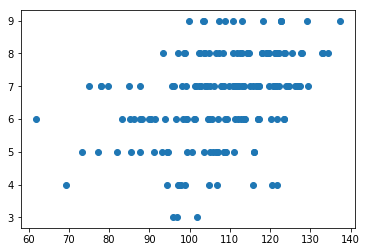

Standard Regression gives R^2 score of 0.15
Correlation analysis gives r = 0.39 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Religious Studies using All years


,length
Initial dataset length,651
After removing NaN entries,227
After removing other non-numeric values,227
Removed entries other than NaN,[]


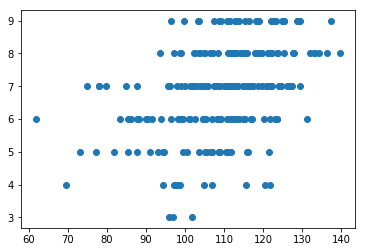

Standard Regression gives R^2 score of 0.17
Correlation analysis gives r = 0.41 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Science (Double) using Pre-numeric


,length
Initial dataset length,299
After removing NaN entries,154
After removing other non-numeric values,154
Removed entries other than NaN,[]


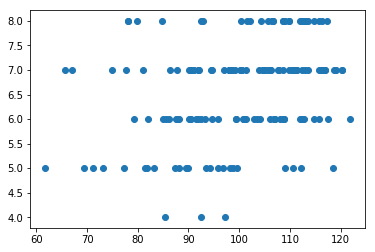

Standard Regression gives R^2 score of 0.11
Correlation analysis gives r = 0.33 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Science (Double) using Numeric (excluding TAGS/CAGS)
No matching data found



Analysis of midYIS mean score and GCSE result in Science (Double) using Numeric (only TAGS/CAGS years)
No matching data found



Analysis of midYIS mean score and GCSE result in Science (Double) using Numeric (all years)
No matching data found



Analysis of midYIS mean score and GCSE result in Science (Double) using All years except TAGS/CAGS


,length
Initial dataset length,299
After removing NaN entries,154
After removing other non-numeric values,154
Removed entries other than NaN,[]


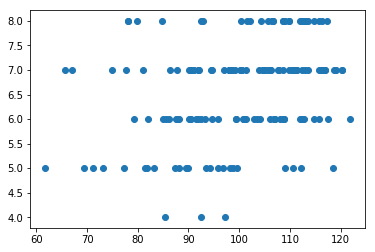

Standard Regression gives R^2 score of 0.11
Correlation analysis gives r = 0.33 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Science (Double) using All years


,length
Initial dataset length,299
After removing NaN entries,154
After removing other non-numeric values,154
Removed entries other than NaN,[]


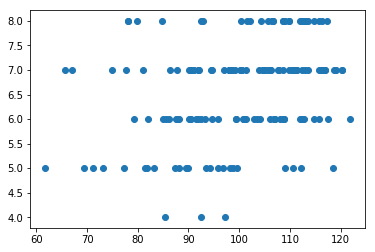

Standard Regression gives R^2 score of 0.11
Correlation analysis gives r = 0.33 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Spanish using Pre-numeric


,length
Initial dataset length,299
After removing NaN entries,74
After removing other non-numeric values,74
Removed entries other than NaN,[]


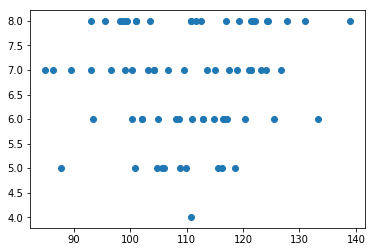

Standard Regression gives R^2 score of 0.01
Correlation analysis gives r = 0.09 with p-value 0.463



Analysis of midYIS mean score and GCSE result in Spanish using Numeric (excluding TAGS/CAGS)


,length
Initial dataset length,180
After removing NaN entries,41
After removing other non-numeric values,41
Removed entries other than NaN,[]


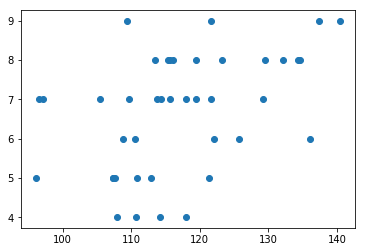

Standard Regression gives R^2 score of 0.19
Correlation analysis gives r = 0.44 with p-value 0.004



Analysis of midYIS mean score and GCSE result in Spanish using Numeric (only TAGS/CAGS years)


,length
Initial dataset length,172
After removing NaN entries,49
After removing other non-numeric values,49
Removed entries other than NaN,[]


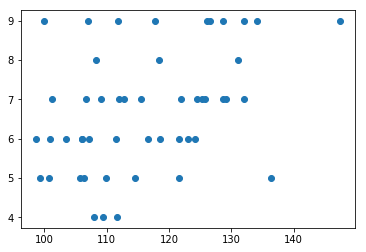

Standard Regression gives R^2 score of 0.16
Correlation analysis gives r = 0.40 with p-value 0.004



Analysis of midYIS mean score and GCSE result in Spanish using Numeric (all years)


,length
Initial dataset length,352
After removing NaN entries,90
After removing other non-numeric values,90
Removed entries other than NaN,[]


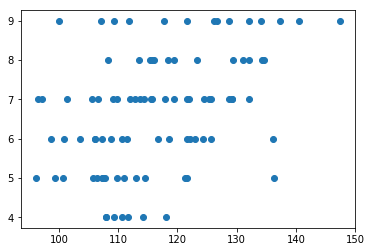

Standard Regression gives R^2 score of 0.17
Correlation analysis gives r = 0.42 with p-value 0.000



Analysis of midYIS mean score and GCSE result in Spanish using All years except TAGS/CAGS


,length
Initial dataset length,479
After removing NaN entries,115
After removing other non-numeric values,115
Removed entries other than NaN,[]


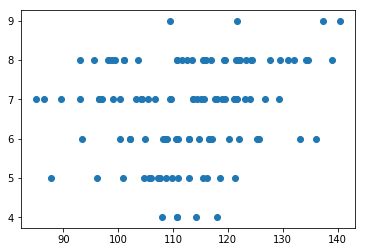

Standard Regression gives R^2 score of 0.05
Correlation analysis gives r = 0.21 with p-value 0.023



Analysis of midYIS mean score and GCSE result in Spanish using All years


,length
Initial dataset length,651
After removing NaN entries,164
After removing other non-numeric values,164
Removed entries other than NaN,[]


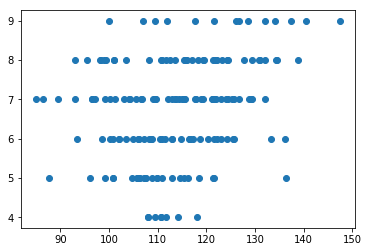

Standard Regression gives R^2 score of 0.07
Correlation analysis gives r = 0.27 with p-value 0.000


,Art & Design,Biology,Chemistry,Classical Civilisation,Design & Technology,Drama,English,English Literature,French,Geography,German,History,Latin,Mathematics,Music,Physical Education,Physics,Religious Studies,Science (Double),Spanish
All years,0.008011,0.126190,0.121848,0.193709,0.032339,0.101226,0.143782,0.071769,0.137221,0.304766,0.148582,0.155144,0.316916,0.198442,0.305311,0.242244,0.081351,0.170787,0.10678,0.072954
All years except TAGS/CAGS,0.017649,0.154813,0.115548,0.193709,0.009943,0.130095,0.105205,0.048188,0.147905,0.287578,0.153522,0.120056,0.316916,0.161948,0.338766,0.224759,0.077822,0.153913,0.10678,0.045039
Numeric (all years),0.044170,0.073957,0.075468,NaN,0.151106,0.050969,0.215839,0.167012,0.155144,0.304450,0.080122,0.224687,NaN,0.294353,0.307418,0.202885,0.086679,0.108900,NaN,0.174772
Numeric (excluding TAGS/CAGS),0.176278,0.117870,0.084767,NaN,0.143511,0.244281,0.184278,0.100378,0.206526,0.322037,0.134376,0.128245,NaN,0.271421,0.371143,0.262381,0.083756,0.135192,NaN,0.194117
Numeric (only TAGS/CAGS years),0.022814,0.045458,0.072803,NaN,0.214214,0.000005,0.278179,0.276877,0.094469,0.289295,0.001747,0.294445,NaN,0.318555,0.217154,0.155254,0.092063,0.049465,NaN,0.161390
Pre-numeric,0.007592,0.176010,0.081646,0.193709,0.011019,0.048032,0.233336,0.107339,0.168459,0.278782,0.252123,0.119808,0.316916,0.204914,0.170684,0.093109,0.088480,0.121437,0.10678,0.007517


,Art & Design,Biology,Chemistry,Classical Civilisation,Design & Technology,Drama,English,English Literature,French,Geography,German,History,Latin,Mathematics,Music,Physical Education,Physics,Religious Studies,Science (Double),Spanish
All years,0.276053,1.366815e-10,3.171503e-10,0.031375,0.008843,0.000179,1.609529e-23,4.104893e-12,2.923916e-14,1.394048e-30,0.001658,1.480604e-16,0.006377,6.548802e-33,0.000001,1.545577e-13,3.554509e-07,8.917032e-11,0.000035,0.000469
All years except TAGS/CAGS,0.162601,1.230420e-09,2.085355e-07,0.031375,0.191801,0.000413,4.497313e-13,1.227747e-06,9.334644e-13,2.725977e-23,0.008531,6.457328e-10,0.006377,5.885771e-20,0.000022,6.315625e-09,2.475191e-05,6.643433e-08,0.000035,0.022787
Numeric (all years),0.068419,4.452038e-04,4.035191e-04,NaN,0.001257,0.051469,1.398880e-25,1.757485e-15,1.169156e-07,4.331505e-15,0.099419,4.095164e-10,NaN,2.908880e-27,0.000548,3.089739e-07,1.362964e-04,5.863511e-04,NaN,0.000041
Numeric (excluding TAGS/CAGS),0.008685,2.236791e-03,1.020135e-02,NaN,0.046814,0.003461,5.553258e-14,1.469668e-05,3.302366e-06,7.441107e-10,0.178976,1.066458e-02,NaN,6.213542e-13,0.020744,7.511256e-05,1.068378e-02,5.750949e-03,NaN,0.003939
Numeric (only TAGS/CAGS years),0.365366,4.872272e-02,1.251483e-02,NaN,0.003434,0.988647,1.057108e-13,2.025613e-13,8.166574e-03,1.102914e-06,0.861124,1.871373e-09,NaN,7.427761e-16,0.033242,1.275433e-03,4.512786e-03,1.205684e-01,NaN,0.004221
Pre-numeric,0.460401,1.500120e-07,4.942140e-04,0.031375,0.208922,0.095366,9.789454e-13,6.537270e-09,1.485970e-10,2.546020e-15,0.005511,1.787073e-08,0.006377,4.570891e-17,0.018765,5.606495e-03,2.796783e-04,8.372648e-05,0.000035,0.462627


In [37]:
import data_analysis
import matplotlib.pyplot as plt
import data_extraction as de
import pandas as pd


"""
list of excel sheet titles (keys for extracted dictionary)
['Yr 9 2012_13', 'Yr 9 2013_14',  ***all subjects graded 1-8 on CEM scale***
 'Yr 9 2014_15', 'Yr 9 2014_15 (9-1)', ***all except English graded 1-8)***
'Yr 9 2015_16', 'Yr 9 2015_16 (9-1)', ***just a few pupils in maths, history and DT graded 1-8 still*** 
'Yr 9 2016_17 (9-1)', 'Yr 9 2017_18 (9-1)', 'Yr 9 2018_19 (9-1)'  ***all subjects graded 1-9***  
]
"""
year_selections = {"Pre-numeric" : ['Yr 9 2012_13', 'Yr 9 2013_14', 'Yr 9 2014_15', 'Yr 9 2015_16'], 
                   "Numeric (excluding TAGS/CAGS)" : ['Yr 9 2014_15 (9-1)', 'Yr 9 2015_16 (9-1)','Yr 9 2016_17 (9-1)'], 
                   "Numeric (only TAGS/CAGS years)" :['Yr 9 2017_18 (9-1)', 'Yr 9 2018_19 (9-1)'], 
                   "Numeric (all years)" : ['Yr 9 2014_15 (9-1)', 'Yr 9 2015_16 (9-1)','Yr 9 2016_17 (9-1)',
                                           'Yr 9 2017_18 (9-1)', 'Yr 9 2018_19 (9-1)'],
                   "All years except TAGS/CAGS" : ['Yr 9 2012_13', 'Yr 9 2013_14', 'Yr 9 2014_15', 'Yr 9 2015_16',
                                    'Yr 9 2014_15 (9-1)', 'Yr 9 2015_16 (9-1)','Yr 9 2016_17 (9-1)'],
                   "All years" : ['Yr 9 2012_13', 'Yr 9 2013_14', 'Yr 9 2014_15', 'Yr 9 2015_16',
                                    'Yr 9 2014_15 (9-1)', 'Yr 9 2015_16 (9-1)','Yr 9 2016_17 (9-1)', 
                                    'Yr 9 2017_18 (9-1)', 'Yr 9 2018_19 (9-1)']
                   
                  }

all_results = {}
linreg_results = {}
corr_results = {}
#data_analysis.GCSE_on_midYIS_regression(verbose = 'True', subject = "Mathematics", criteria = "Actual GCSE Points")

for subject in de.SUBJECTS:
    all_results[subject] = {}
    linreg_results[subject] = {}
    corr_results[subject] = {}
    for years_key in year_selections.keys():
        years = year_selections[years_key]
        print("\n\n\nAnalysis of midYIS mean score and GCSE result in {0} using {1}".format(subject, years_key))
        all_results[subject][years_key] = data_analysis.GCSE_on_midYIS_regression(years = years, \
                                                                              subject = subject, criteria = 'Actual GCSE Points', 
                                                                              display_results = True, verbose = False)
        linreg_results[subject][years_key] = all_results[subject][years_key]['R2 score']
        corr_results[subject][years_key] = all_results[subject][years_key]['p value']
        
display(pd.DataFrame.from_dict(linreg_results))
display(pd.DataFrame.from_dict(corr_results))

In [39]:
#### results storage

import data_analysis
import pickle
RESULTS_DIR = "C:/Users/owen/OneDrive - Eastbourne College/School analytics project/Results"

df_corr = pd.DataFrame.from_dict(corr_results)
df_linreg = pd.DataFrame.from_dict(linreg_results)
if OVERWRITE_RESULTS:
    df_corr.to_excel("{0}/GCSE to MidYIS correlation p values.xls".format(RESULTS_DIR))
    df_linreg.to_excel("{0}/GCSE to MidYIS linear regression R2 scores.xls".format(RESULTS_DIR))
    #display(t)
    file = "{0}/GCSE_to_MIDYIS_full_output.pickle".format(RESULTS_DIR)
    with open(file, 'wb') as f:
        pickle.dump(all_results, f)

In [32]:
#unused at the moment - copies results dictionary and changes dataframes to json strings
results_to_store = {}
for subject_key in all_results.keys():
    results_to_store[subject_key] = {}
    for year_key in all_results[subject_key].keys():
        level3keys = all_results[subject_key][year_key].keys()
        results_to_store[subject_key][year_key] = {all_results[subject_key][year_key][key3].to_json()
                                                   if isinstance(all_results[subject_key][year_key][key3], pd.DataFrame) 
                                                  else all_results[subject_key][year_key][key3]
                                                   for key3 in level3keys 
                                                  }
        
results_to_store       

{'Art & Design': {'All years': {0.0080111794129921199,
   0.089505192100748865,
   '{"["Pupil Information","Surname"]":{"4":"ARNOLD              ","5":"ASKAROFF            ","16":"CHUI                ","20":"DUTTON              ","31":"GOODWIN             ","35":"HARDY               ","41":"HOBDEN              ","48":"JOYCE               ","55":"LYUBIMOVA           ","61":"MCNEISH             ","65":"NEWTON              ","69":"PAVEY               ","72":"PIPER               ","73":"PORTER              ","83":"SUN                 ","85":"TSANG               ","87":"VLASYUK             ","91":"WEBBER              ","93":"WOHLRAB             ","95":"WOLSTENHOLME        ","103":"ALLAN               ","106":"BARON               ","109":"BROWN               ","111":"CARR                ","115":"CHOW                ","117":"CLOKE               ","120":"DARIA               ","123":"DICKINSON           ","125":"DIXON               ","126":"DONG                ","129":"FRANKLIN            ","13

In [48]:
display(linreg_results['Art & Design'].keys())
t = data_analysis.do_ttest(linreg_results, keys_to_compare = ['Numeric (only TAGS/CAGS years)', 'All years except TAGS/CAGS'])
t

dict_keys(['Pre-numeric', 'Numeric (excluding TAGS/CAGS)', 'Numeric (only TAGS/CAGS years)', 'Numeric (all years)', 'All years except TAGS/CAGS', 'All years'])

Ttest_1sampResult(statistic=-0.53936362821400741, pvalue=0.5970624906917491)